radians sin cos acos
rad=6371
formula=acos((sin(1lat)*sin(2lat))+(cos(1lat)*cos(2lat)*cos(2lon-1lon)))
dist=rad*formula

In [1]:
import numpy as np
import pandas as pd

# Data cleaning

In [52]:
dataset_train=pd.read_csv('D:/lib/delivery time predit/train.csv')
dataset_train.drop(['ID','Delivery_person_ID'],axis=1,inplace=True)
col=dataset_train.columns.to_list()
for i in col:
    dataset_train[i]=dataset_train[i].astype(object)
print(dataset_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Delivery_person_Age          45593 non-null  object
 1   Delivery_person_Ratings      45593 non-null  object
 2   Restaurant_latitude          45593 non-null  object
 3   Restaurant_longitude         45593 non-null  object
 4   Delivery_location_latitude   45593 non-null  object
 5   Delivery_location_longitude  45593 non-null  object
 6   Order_Date                   45593 non-null  object
 7   Time_Orderd                  45593 non-null  object
 8   Time_Order_picked            45593 non-null  object
 9   Weatherconditions            45593 non-null  object
 10  Road_traffic_density         45593 non-null  object
 11  Vehicle_condition            45593 non-null  object
 12  Type_of_order                45593 non-null  object
 13  Type_of_vehicle              45

In [53]:
df=dataset_train[['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude',
                  'Delivery_location_longitude']]
distan=[]
from math import radians,cos,sin,acos
rad=6371
for i,j in df.iterrows():
    temp=j
    lat1=temp[temp.index=='Restaurant_latitude'].values
    lat2=temp[temp.index=='Delivery_location_latitude'].values
    lon1=temp[temp.index=='Restaurant_longitude'].values
    lon2=temp[temp.index=='Delivery_location_longitude'].values
    lat1 =radians(lat1)
    lat2 =radians(lat2)
    lon1 =radians(lon1)
    lon2 =radians(lon2)
    formula=acos((sin(lat1)*sin(lat2))+(cos(lat1)*cos(lat2)*cos(lon2-lon1)))
    dist=rad*formula
    distan.append(dist)
distance=pd.Series(distan,name='Distance')

In [54]:
dataset_train.drop(['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude',
                  'Delivery_location_longitude'],axis=1,inplace=True)
dataset_train=pd.concat([dataset_train,distance],axis=1)
dataset_train["Time_taken(min)"] = dataset_train["Time_taken(min)"].str.replace("(min)","")
dataset_train["Weatherconditions"] = dataset_train["Weatherconditions"].str.replace("conditions","")
dataset_train['Distance']=dataset_train["Distance"].round(decimals=1)

In [55]:
dataset_train["City"]=dataset_train["City"].str.replace("NaN","other")
col=dataset_train.columns.to_list()
for i in col:
    place=dataset_train[dataset_train[i]=='NaN '].index
    dataset_train.drop(place,inplace=True)

In [56]:
dataset_train["Order_Date"] = pd.to_datetime(dataset_train.Order_Date)
dataset_train['year'] = dataset_train['Order_Date'].dt.year 
dataset_train['month'] = dataset_train['Order_Date'].dt.month 
dataset_train["day"]=dataset_train["Order_Date"].dt.day

dataset_train["Time_Orderd"] = pd.to_datetime(dataset_train.Time_Orderd)
dataset_train['time_ord_hour'] = dataset_train['Time_Orderd'].dt.hour 
dataset_train['time_ord_minute'] = dataset_train['Time_Orderd'].dt.minute

dataset_train["Time_Order_picked"] = pd.to_datetime(dataset_train.Time_Order_picked)
dataset_train['time_order_picked_hour'] = dataset_train['Time_Order_picked'].dt.hour 
dataset_train['time_order_picked_minute'] = dataset_train['Time_Order_picked'].dt.minute

dataset_train.drop(["Time_Orderd","Time_Order_picked","Order_Date"],axis=1,inplace=True)

C:\Users\vigne\AppData\Local\Temp\ipykernel_16368\3710773355.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dataset_train["Order_Date"] = pd.to_datetime(dataset_train.Order_Date)
C:\Users\vigne\AppData\Local\Temp\ipykernel_16368\3710773355.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset_train["Time_Orderd"] = pd.to_datetime(dataset_train.Time_Orderd)
C:\Users\vigne\AppData\Local\Temp\ipykernel_16368\3710773355.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset_train["Time_Order_picked"] = pd.to_datetime(dataset_train.Time_Order_picked)


In [57]:
convert={'Delivery_person_Age':int,'Delivery_person_Ratings':float,'Vehicle_condition':int,
        'multiple_deliveries':int,'Time_taken(min)':int,'Distance':float,'year':int,
        'month':int,'day':int,'time_ord_hour':int,'time_ord_minute':int,'time_order_picked_hour':int,
        'time_order_picked_minute':int}
dataset_train=dataset_train.astype(convert)
print(dataset_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 42453 entries, 0 to 45592
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Delivery_person_Age       42453 non-null  int32  
 1   Delivery_person_Ratings   42453 non-null  float64
 2   Weatherconditions         42453 non-null  object 
 3   Road_traffic_density      42453 non-null  object 
 4   Vehicle_condition         42453 non-null  int32  
 5   Type_of_order             42453 non-null  object 
 6   Type_of_vehicle           42453 non-null  object 
 7   multiple_deliveries       42453 non-null  int32  
 8   Festival                  42453 non-null  object 
 9   City                      42453 non-null  object 
 10  Time_taken(min)           42453 non-null  int32  
 11  Distance                  42453 non-null  float64
 12  year                      42453 non-null  int32  
 13  month                     42453 non-null  int32  
 14  day        

In [58]:
dataset_train=dataset_train.reset_index(drop=True)
dataset_train=dataset_train[['Delivery_person_Age','Delivery_person_Ratings','Weatherconditions','Road_traffic_density',
                'Vehicle_condition','Type_of_order','Type_of_vehicle','multiple_deliveries',
                'Festival','City','Distance','year','month','day','time_ord_hour','time_ord_minute',
                 'time_order_picked_hour','time_order_picked_minute','Time_taken(min)']]
print(dataset_train)
path='D:/lib/delivery time predit/clean_train.csv'
dataset_train.to_csv(path)

       Delivery_person_Age  Delivery_person_Ratings Weatherconditions  \
0                       37                      4.9             Sunny   
1                       34                      4.5            Stormy   
2                       23                      4.4        Sandstorms   
3                       38                      4.7             Sunny   
4                       32                      4.6            Cloudy   
...                    ...                      ...               ...   
42448                   30                      4.8             Windy   
42449                   21                      4.6             Windy   
42450                   30                      4.9            Cloudy   
42451                   20                      4.7            Cloudy   
42452                   23                      4.9               Fog   

      Road_traffic_density  Vehicle_condition Type_of_order Type_of_vehicle  \
0                    High                   

# Machine learning

In [1]:
import numpy as np
import pandas as pd
dataset=pd.read_csv('D:/lib/delivery time predit/clean_train.csv',index_col=0)
from sklearn.model_selection import GridSearchCV

In [2]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
col=dataset.columns.to_list()
for i in col:
    if dataset[i].dtype==object:
        dataset[i]=le.fit_transform(dataset[i])
    if dataset[i].dtype==float:
        dataset[i]=dataset[i].astype(int)
x=dataset.iloc[:,0:18]
y=dataset.iloc[:,18]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.05)

In [3]:
from sklearn.linear_model import LinearRegression
lin=LinearRegression()
lin.fit(x_train,y_train)
y_pred=lin.predict(x_test)
y_pred=pd.Series(y_pred)
y_pred=round(y_pred)
y_pred=y_pred.astype(int)
print('trainscore=',lin.score(x_train,y_train))
print('testscore=',lin.score(x_test,y_test))
corr_lin=y_pred.corr(y_test)
print('corr=',corr_lin)
from sklearn.metrics import mean_squared_error,r2_score
r2score_lin=r2_score(y_test,y_pred)
print('r2score=',r2score_lin)
mse_lin=mean_squared_error(y_test,y_pred)
print("Mean Squared Error=",mse_lin)
rmse_lin=mean_squared_error(y_test,y_pred,squared=False)
print("Root Mean Squared Error=",rmse_lin)
same_lin=0
diff_lin=0
y_test=y_test.to_list()
y_pred=y_pred.to_list()
for test,pred in zip(y_test,y_pred):
    if test==pred:
        same_lin=same_lin+1
    else:
        diff_lin=diff_lin+1
print('same=',same_lin)
print('diff=',diff_lin)

trainscore= 0.4084138249869834
testscore= 0.381587174316835
corr= -0.034654167273798275
r2score= 0.3814696646396861
Mean Squared Error= 52.256712199717384
Root Mean Squared Error= 7.2288804250532035
same= 118
diff= 2005


In [4]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
print('trainscore=',svr.score(x_train,y_train))
y_pred=svr.predict(x_test)
grid = {
    'C': [0.1,1.0,10.0],
    'epsilon': [0.1,0.01,0.001],
    'kernel': ['linear','rbf']
}
#grid_search=GridSearchCV(estimator=svr,param_grid=grid,cv=5)
#grid_search.fit(x_train,y_train)
#print(grid_search.score(x_train,y_train))
#y_pred=grid_search.predict(x_test)
y_pred=pd.Series(y_pred)
y_test = pd.Series(y_test)
y_pred=round(y_pred)
y_pred=y_pred.astype(int)
print('testscore=',svr.score(x_test,y_test))
corr_svm=y_pred.corr(y_test)
print('corr=',corr_svm)
from sklearn.metrics import mean_squared_error,r2_score
r2score_svm=r2_score(y_test,y_pred)
print('r2score=',r2score_svm)
mse_svm=mean_squared_error(y_test,y_pred)
print("Mean Squared Error=",mse_svm)
rmse_svm=mean_squared_error(y_test,y_pred,squared=False)
print("Root Mean Squared Error=",rmse_svm)
same_svm=0
diff_svm=0
y_test=y_test.to_list()
y_pred=y_pred.to_list()
for test,pred in zip(y_test,y_pred):
    if test==pred:
        same_svm=same_svm+1
    else:
        diff_svm=diff_svm+1
print('same=',same_svm)
print('diff=',diff_svm)

trainscore= 0.01910478809563665
testscore= 0.019148791508220908
corr= 0.28309991236534554
r2score= 0.020490720036348442
Mean Squared Error= 82.75412152614226
Root Mean Squared Error= 9.09692923607424
same= 93
diff= 2030


In [5]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor()
dtree.fit(x_train,y_train)
print('trainscore=',dtree.score(x_train,y_train))
y_pred=dtree.predict(x_test)
y_pred=pd.Series(y_pred)
y_test = pd.Series(y_test)
y_pred=round(y_pred)
y_pred=y_pred.astype(int)
print('testscore=',dtree.score(x_test,y_test))
corr_dtree=y_pred.corr(y_test)
print('corr=',corr_dtree)
from sklearn.metrics import mean_squared_error,r2_score
r2score_dtree=r2_score(y_test,y_pred)
print('r2score=',r2score_dtree)
mse_dtree=mean_squared_error(y_test,y_pred)
print("Mean Squared Error=",mse_dtree)
rmse_dtree=mean_squared_error(y_test,y_pred,squared=False)
print("Root Mean Squared Error=",rmse_dtree)
same_dtree=0
diff_dtree=0
y_test=y_test.to_list()
y_pred=y_pred.to_list()
for test,pred in zip(y_test,y_pred):
    if test==pred:
        same_dtree=same_dtree+1
    else:
        diff_dtree=diff_dtree+1
print('same=',same_dtree)
print('diff=',diff_dtree)

trainscore= 0.9999364908204749
testscore= 0.6168703534705346
corr= 0.808556965130523
r2score= 0.6168703534705346
Mean Squared Error= 32.36881771078662
Root Mean Squared Error= 5.689360044045958
same= 204
diff= 1919


In [6]:
from sklearn.ensemble import RandomForestRegressor
clf=RandomForestRegressor(n_estimators=100,random_state=42)
clf.fit(x_train,y_train)
print('trainscore=',clf.score(x_train,y_train))
y_pred=clf.predict(x_test)
y_pred=pd.Series(y_pred)
y_test = pd.Series(y_test)
y_pred=round(y_pred)
y_pred=y_pred.astype(int)
print('testscore=',clf.score(x_test,y_test))
corr_ran=y_pred.corr(y_test)
print('corr=',corr_ran)
from sklearn.metrics import mean_squared_error,r2_score
r2score_ran=r2_score(y_test,y_pred)
print('r2score=',r2score_ran)
mse_ran=mean_squared_error(y_test,y_pred)
print("Mean Squared Error=",mse_ran)
rmse_ran=mean_squared_error(y_test,y_pred,squared=False)
print("Root Mean Squared Error=",rmse_ran)
same_ran=0
diff_ran=0
y_test=y_test.to_list()
y_pred=y_pred.to_list()
for test,pred in zip(y_test,y_pred):
    if test==pred:
        same_ran=same_ran+1
    else:
        diff_ran=diff_ran+1
print('same=',same_ran)
print('diff=',diff_ran)

trainscore= 0.9737427898407347
testscore= 0.7943639219942578
corr= 0.8915266473333172
r2score= 0.7936410947919047
Mean Squared Error= 17.434291097503532
Root Mean Squared Error= 4.17543903050967
same= 216
diff= 1907


In [7]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(n_estimators=200,learning_rate=0.2,max_depth=4,random_state=42)
gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_test)
y_pred=pd.Series(y_pred)
y_test = pd.Series(y_test)
y_pred=round(y_pred)
y_pred=y_pred.astype(int)
print('corr=',y_pred.corr(y_test))
from sklearn.metrics import mean_squared_error,r2_score
r2score_gbr=r2_score(y_test,y_pred)
print('r2 score=',r2score_gbr)
mse_gbr=mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error= {mse_gbr}")
rmse_gbr=mean_squared_error(y_test,y_pred,squared=False)
print(f"Root Mean Squared Error= {rmse_gbr}")
same_gbr=0
diff_gbr=0
y_test=y_test.to_list()
y_pred=y_pred.to_list()
for test,pred in zip(y_test,y_pred):
    if test==pred:
        same_gbr=same_gbr+1
    else:
        diff_gbr=diff_gbr+1
print('same=',same_gbr)
print('diff=',diff_gbr)

corr= 0.8827307614641946
r2 score= 0.7791731684142804
Mean Squared Error= 18.656617993405558
Root Mean Squared Error= 4.319330734431615
same= 167
diff= 1956


In [8]:
data={'r2score':[r2score_lin,r2score_svm,r2score_dtree,r2score_ran,r2score_gbr],
      'mse':[mse_lin,mse_svm,mse_dtree,mse_ran,mse_gbr],
      'rmse':[rmse_lin,rmse_svm,rmse_dtree,rmse_ran,rmse_gbr]}
target_1=pd.DataFrame(data,index=['linear','svr','decisiontree','ranfor','gbr'])
print(target_1)

               r2score        mse      rmse
linear        0.381470  52.256712  7.228880
svr           0.020491  82.754122  9.096929
decisiontree  0.616870  32.368818  5.689360
ranfor        0.793641  17.434291  4.175439
gbr           0.779173  18.656618  4.319331


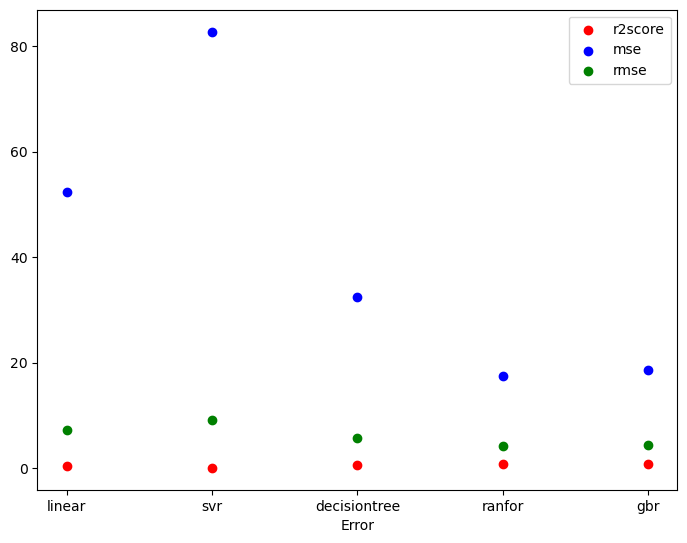

In [9]:
import matplotlib.pyplot as plt
y1=target_1['r2score']
y2=target_1['mse']
y3=target_1['rmse']
x=target_1.index.values
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x,y1,color='r')
ax.scatter(x,y2,color='b')
ax.scatter(x,y3,color='g')
ax.legend(labels=['r2score','mse','rmse'])
ax.set_xlabel('Error')
plt.show()

In [10]:
data={'same':[same_lin,same_svm,same_dtree,same_ran,same_gbr],
      'diff':[diff_lin,diff_svm,diff_dtree,diff_ran,diff_gbr]}
target_2=pd.DataFrame(data,index=['linear','svr','decisiontree','ranfor','gbr'])
print(target_2)

              same  diff
linear         118  2005
svr             93  2030
decisiontree   204  1919
ranfor         216  1907
gbr            167  1956


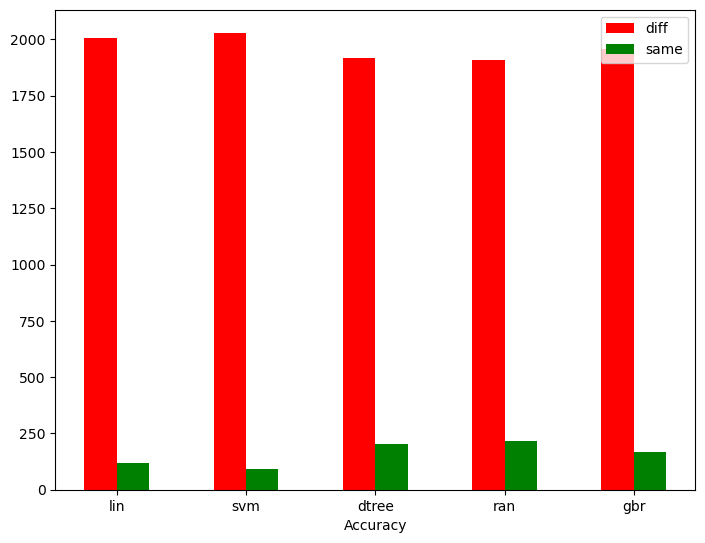

In [27]:
diff=data['diff']
same=data['same']
x=['lin','svm','dtree','ran','gbr']
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
X=np.arange(5)
ax.bar(X,diff, color = 'r',width=0.25,label='diff')
ax.bar(X+0.25,same, color = 'g',width=0.25,label='same')
ax.legend(labels=['diff','same'])
ax.set_xlabel('Accuracy')
ax.set_xticks(X + 0.25/2,x)
plt.show()